# Expression Quality Control (Part 2)

This is a template notebook for performing the final quality control on your organism's expression data. This requires a curated metadata sheet.

## Setup 

In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path
from scipy import stats
from tqdm.notebook import tqdm

In [2]:
sns.set_style('ticks')

### Inputs

In [3]:
logTPM_file = path.join('..','data','5g_processed_data','log_norm_uMax_indiv.csv') # Enter log-TPM filename here
all_metadata_file = path.join('..','data','5g_processed_data','5G_exp_metadata_coded.tsv') # Enter full metadata filename here
metadata_file = path.join('..','data','5g_processed_data','final_meta.tsv') # Enter curated metadata filename here

### Load expression data

In [4]:
DF_log_tpm = pd.read_csv(logTPM_file,index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])
DF_log_tpm.head()

Number of genes: 4213
Number of samples: 98


,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
locus_tag,,,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-4.135351,-3.097173,-0.081618,0.013543,-1.005473,-0.565908,-0.868240,-0.861181,-0.860286,-0.810841,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
EQU24_RS00010,-5.201540,-3.930131,-0.213951,-0.115316,-0.677320,-0.569877,-1.119576,-1.054664,-1.167149,-1.149678,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
EQU24_RS00015,-4.569572,-3.725040,0.002850,-0.174656,-0.639651,-0.279816,-1.029608,-1.120098,-1.028006,-0.996256,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
EQU24_RS00020,-4.461081,-4.035474,-0.130356,0.040745,-0.414605,-0.346534,-0.941858,-0.957353,-0.913985,-0.980052,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
EQU24_RS00025,-4.950035,-3.637451,0.659048,0.404700,-0.031390,0.291903,-0.787794,-0.640604,-0.818610,-0.839456,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679


### Load metadata

In [5]:
DF_metadata = pd.read_csv(metadata_file,sep='\t')
print('Number of samples with curated metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with curated metadata: 86


,sample_id,exp_theme,exp_condition,sample,shortd,longd,carbon_source,oxygen_level,nitrate_level,copper_level,lanthanum_level,growth_rate,growth_mode,include?,notes,cluster_id,project,condition,reference_condition
0,5GB1_FM03_TR1_QC_tpm,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,1,5G,uMax,uMax
1,5GB1_FM03_TR2_QC_tpm,uMax,uMax,5GB1_FM03_TR2_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,3,5G,uMax,uMax
2,5GB1_FM11_TR1_QC_tpm,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR1_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",2,0,0,3,0,1,0,1,NaN,18,5G,lowO2_fast_growth,uMax
3,5GB1_FM11_TR2_QC_tpm,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR2_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",2,0,0,3,0,1,0,1,NaN,18,5G,lowO2_fast_growth,uMax
4,5GB1_FM12_TR1_tpm,lowCH4,lowCH4,5GB1_FM12_TR1,lowCH4,"Fermentor run 12, methane limited",1,1,0,3,0,1,0,1,NaN,17,5G,lowCH4,uMax


In [6]:
DF_metadata_all = pd.read_csv(all_metadata_file,sep='\t')

## Remove samples due to poor metadata

After curation, some samples either did not have enough replicates or metadata to warrant inclusion in this database.

In [7]:
DF_metadata_passed_step4 = DF_metadata#[~DF_metadata.skip.fillna(False)].copy()
print('New number of samples with curated metadata:',DF_metadata_passed_step4.shape[0])
DF_metadata_passed_step4.head()

New number of samples with curated metadata: 86


,sample_id,exp_theme,exp_condition,sample,shortd,longd,carbon_source,oxygen_level,nitrate_level,copper_level,lanthanum_level,growth_rate,growth_mode,include?,notes,cluster_id,project,condition,reference_condition
0,5GB1_FM03_TR1_QC_tpm,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,1,5G,uMax,uMax
1,5GB1_FM03_TR2_QC_tpm,uMax,uMax,5GB1_FM03_TR2_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,3,5G,uMax,uMax
2,5GB1_FM11_TR1_QC_tpm,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR1_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",2,0,0,3,0,1,0,1,NaN,18,5G,lowO2_fast_growth,uMax
3,5GB1_FM11_TR2_QC_tpm,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR2_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",2,0,0,3,0,1,0,1,NaN,18,5G,lowO2_fast_growth,uMax
4,5GB1_FM12_TR1_tpm,lowCH4,lowCH4,5GB1_FM12_TR1,lowCH4,"Fermentor run 12, methane limited",1,1,0,3,0,1,0,1,NaN,17,5G,lowCH4,uMax


### Check curation
Since manual curation is error-prone, we want to make sure that all samples have labels for their project and condition. In addition, there should only be one reference condition in each project, and it should be in the project itself.

Any samples that fail these checks will be printed below.

In [8]:
assert(DF_metadata_passed_step4.project.notnull().all())
assert(DF_metadata_passed_step4.condition.notnull().all())

for name,group in DF_metadata_passed_step4.groupby('project'):
    ref_cond = group.reference_condition.unique()
    
    # Ensure that there is only one reference condition per project
    if not len(ref_cond) == 1:
        print('Multiple reference conditions for:, name')
    
    # Ensure the reference condition is in fact in the project
    ref_cond = ref_cond[0]
    if not ref_cond in group.condition.tolist():
        print('Reference condition not in project:', name)

Next, make a new column called ``full_name`` that gives every experimental condition a unique, human-readable identifier.

In [9]:
DF_metadata_passed_step4['full_name'] = DF_metadata_passed_step4['project'].str.cat(DF_metadata_passed_step4['condition'],sep=':')

In [10]:
DF_metadata_passed_step4

,sample_id,exp_theme,exp_condition,sample,shortd,longd,carbon_source,oxygen_level,nitrate_level,copper_level,lanthanum_level,growth_rate,growth_mode,include?,notes,cluster_id,project,condition,reference_condition,full_name
0,5GB1_FM03_TR1_QC_tpm,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,1,5G,uMax,uMax,5G:uMax
1,5GB1_FM03_TR2_QC_tpm,uMax,uMax,5GB1_FM03_TR2_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,3,5G,uMax,uMax,5G:uMax
2,5GB1_FM11_TR1_QC_tpm,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR1_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",2,0,0,3,0,1,0,1,NaN,18,5G,lowO2_fast_growth,uMax,5G:lowO2_fast_growth
3,5GB1_FM11_TR2_QC_tpm,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR2_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",2,0,0,3,0,1,0,1,NaN,18,5G,lowO2_fast_growth,uMax,5G:lowO2_fast_growth
4,5GB1_FM12_TR1_tpm,lowCH4,lowCH4,5GB1_FM12_TR1,lowCH4,"Fermentor run 12, methane limited",1,1,0,3,0,1,0,1,NaN,17,5G,lowCH4,uMax,5G:lowCH4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,5GB1C-5G-N-BR2_tpm,Lanthanum,NoLanthanum,5GB1C-5G-N-BR2,NoLa_rep2,Vial sample in mid- to late-exponential phase,2,1,0,3,0,2,1,1,NaN,12,5G,NoLanthanum,uMax,5G:NoLanthanum
82,5GB1C-JG15-La-BR1_tpm,Lanthanum,WithLanthanum,5GB1C-JG15-La-BR1,deltaTBDT_La_rep1,Vial sample in mid- to late-exponential phase,2,1,0,3,1,2,1,1,NaN,12,5G,WithLanthanum,uMax,5G:WithLanthanum
83,5GB1C-JG15-La-BR2_tpm,Lanthanum,WithLanthanum,5GB1C-JG15-La-BR2,deltaTBDT_La_rep2,Vial sample in mid- to late-exponential phase,2,1,0,3,1,2,1,1,NaN,12,5G,WithLanthanum,uMax,5G:WithLanthanum
84,5GB1C-JG15-N-BR1_tpm,Lanthanum,NoLanthanum,5GB1C-JG15-N-BR1,deltaTBDT_NoLa_rep1,Vial sample in mid- to late-exponential phase,2,1,0,3,0,2,1,1,NaN,12,5G,NoLanthanum,uMax,5G:NoLanthanum


### Remove samples with only one replicate

First, find sample names that have at least two replicates.

In [11]:
counts = DF_metadata_passed_step4.full_name.value_counts()
keep_samples = counts[counts >= 2].index
print(keep_samples[:5])

Index(['5G:uMax', '5G:lowO2_fast_growth', '5G:lowCH4', '5G:lowCu', '5G:MeOH'], dtype='object')


Only keep these samples

In [12]:
DF_metadata_passed_step4 = DF_metadata_passed_step4[DF_metadata_passed_step4.full_name.isin(keep_samples)]
print('New number of samples with curated metadata:',DF_metadata_passed_step4.shape[0])
DF_metadata_passed_step4.head()

New number of samples with curated metadata: 86


,exp_theme,exp_condition,sample,shortd,longd,carbon_source,oxygen_level,nitrate_level,copper_level,lanthanum_level,growth_rate,growth_mode,include?,notes,sample_id,cluster_id,project,condition,reference_condition,full_name
0,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,5GB1_FM03_TR1_QC_tpm,1,5G,uMax,uMax,5G:uMax
1,uMax,uMax,5GB1_FM03_TR2_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,5GB1_FM03_TR2_QC_tpm,3,5G,uMax,uMax,5G:uMax
2,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR1_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",2,0,0,3,0,1,0,1,NaN,5GB1_FM11_TR1_QC_tpm,18,5G,lowO2_fast_growth,uMax,5G:lowO2_fast_growth
3,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR2_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",2,0,0,3,0,1,0,1,NaN,5GB1_FM11_TR2_QC_tpm,18,5G,lowO2_fast_growth,uMax,5G:lowO2_fast_growth
4,lowCH4,lowCH4,5GB1_FM12_TR1,lowCH4,"Fermentor run 12, methane limited",1,1,0,3,0,1,0,1,NaN,5GB1_FM12_TR1_tpm,17,5G,lowCH4,uMax,5G:lowCH4


### Save this information to the full metadata dataframe

In [12]:
DF_metadata_all['passed_curation'] = DF_metadata_all.index.isin(DF_metadata_passed_step4.index)

## Check correlations between replicates

### Remove failed data from log_tpm files

In [11]:
DF_log_tpm = DF_log_tpm[DF_metadata_passed_step4.sample_id]

In [12]:
DF_log_tpm

,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,5GB1_FM14_TR1_tpm,5GB1_FM14_TR1_QC_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
locus_tag,,,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-0.081618,0.013543,-1.005473,-0.565908,-0.868240,-0.861181,-0.860286,-0.810841,-0.466774,-0.532657,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
EQU24_RS00010,-0.213951,-0.115316,-0.677320,-0.569877,-1.119576,-1.054664,-1.167149,-1.149678,-0.423026,-0.491606,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
EQU24_RS00015,0.002850,-0.174656,-0.639651,-0.279816,-1.029608,-1.120098,-1.028006,-0.996256,-0.586234,-0.612814,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
EQU24_RS00020,-0.130356,0.040745,-0.414605,-0.346534,-0.941858,-0.957353,-0.913985,-0.980052,-0.512366,-0.460317,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
EQU24_RS00025,0.659048,0.404700,-0.031390,0.291903,-0.787794,-0.640604,-0.818610,-0.839456,-0.307450,-0.396271,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22135,0.233098,0.224448,-0.183783,-0.574685,-0.595432,-0.635461,-0.421307,-0.361413,-0.451241,-0.424640,...,-0.325961,0.050177,-2.102599,-1.773232,-2.098279,-1.530483,-2.007522,-2.169496,-2.149623,-1.858454
EQU24_RS22140,-0.176841,-0.095379,-1.044380,-1.025606,-1.067681,-1.067686,-1.022445,-0.973605,-0.745638,-0.707825,...,-0.384478,-0.090839,-2.023112,-1.632494,-2.092212,-1.369533,-2.157892,-2.198065,-2.257044,-1.713649
EQU24_RS22145,0.158857,0.144749,-0.784843,-0.435052,-0.574781,-0.535126,-0.518936,-0.496199,-0.494643,-0.590418,...,-0.572687,-0.441383,-2.694444,-2.569869,-2.842215,-2.911701,-3.232890,-2.884240,-3.006455,-2.753670


### Compute Pearson R Score

Biological replicates should have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. The correlation threshold can be changed below:

In [13]:
rcutoff = 0.95

In [14]:
DF_metadata_passed_step4[DF_metadata_passed_step4.sample_id == exp2]['full_name'].values[0]

NameError: name 'exp2' is not defined

In [27]:
DF_metadata_passed_step4[DF_metadata_passed_step4.sample_id == exp2]['full_name'][0]

KeyError: 0

The following code computes correlations between all samples and collects correlations between replicates and non-replicates.

In [19]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed_step4)*(len(DF_metadata_passed_step4)-1)/2

for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed_step4.sample_id,2),total=num_comparisons):
    #print(exp1,exp2)
    exp1_full = DF_metadata_passed_step4[DF_metadata_passed_step4.sample_id == exp1]['full_name'].values[0]
    exp2_full = DF_metadata_passed_step4[DF_metadata_passed_step4.sample_id == exp2]['full_name'].values[0]
    #print(exp1_full,exp2_full)
    #if DF_metadata_passed_step4.loc[exp1,'full_name'] == DF_metadata_passed_step4.loc[exp2,'full_name']:
    if exp1_full == exp2_full:
        p = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
        rep_corrs[(exp1,exp2)] = p
        if p>0.8:
            print(f"Same: ({exp1_full},{exp2_full}) for {exp1} vs {exp2}")
            print("Should be close: p=",p)
            print()
    else:
        p = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
        rand_corrs[(exp1,exp2)] = p
        
#         if p>0.8:
#             print(f"Diff: ({exp1_full},{exp2_full}) for {exp1} vs {exp2}")
#             print("Should be far but p=",p)
#             print()

  0%|          | 0/3655.0 [00:00<?, ?it/s]

Same: (5G:lowCH4,5G:lowCH4) for 5GB1_FM12_TR1_tpm vs 5GB1_FM12_TR1_QC_tpm
Should be close: p= 0.97168935331013

Same: (5G:lowCH4,5G:lowCH4) for 5GB1_FM12_TR1_tpm vs 5GB1_FM12_TR2_tpm
Should be close: p= 0.9675670665635588

Same: (5G:lowCH4,5G:lowCH4) for 5GB1_FM12_TR1_tpm vs 5GB1_FM12_TR2_QC_tpm
Should be close: p= 0.9155398205502658

Same: (5G:lowCH4,5G:lowCH4) for 5GB1_FM12_TR1_tpm vs 5GB1_FM14_TR1_tpm
Should be close: p= 0.8788188643806165

Same: (5G:lowCH4,5G:lowCH4) for 5GB1_FM12_TR1_tpm vs 5GB1_FM14_TR1_QC_tpm
Should be close: p= 0.8390736764036253

Same: (5G:lowCH4,5G:lowCH4) for 5GB1_FM12_TR1_tpm vs 5GB1_FM14_TR2_tpm
Should be close: p= 0.8391561408629988

Same: (5G:lowCH4,5G:lowCH4) for 5GB1_FM12_TR1_tpm vs 5GB1_FM14_TR2_QC_tpm
Should be close: p= 0.8200690017066293

Same: (5G:lowCH4,5G:lowCH4) for 5GB1_FM12_TR1_QC_tpm vs 5GB1_FM12_TR2_tpm
Should be close: p= 0.9442963884891585

Same: (5G:lowCH4,5G:lowCH4) for 5GB1_FM12_TR1_QC_tpm vs 5GB1_FM12_TR2_QC_tpm
Should be close: p= 0.

Same: (5G:medCu,5G:medCu) for 5GB1_FM40_T90m_TR2_tpm vs 5GB1_FM40_T90m_TR2_QC_tpm
Should be close: p= 0.9311163425427871

Same: (5G:highO2_slow_growth,5G:highO2_slow_growth) for 5GB1_FM69_t3_TR1_tpm vs 5GB1_FM69_t4_TR1_tpm
Should be close: p= 0.9594179765122304

Same: (5G:highO2_slow_growth,5G:highO2_slow_growth) for 5GB1_FM69_t3_TR1_UW_tpm vs 5GB1_FM69_t4_TR1_UW_tpm
Should be close: p= 0.8353313689872153

Same: (5G:NO3_lowO2_slow_growth,5G:NO3_lowO2_slow_growth) for 5GB1_FM80_t2_TR1_tpm vs 5GB1_FM80_t4_TR1_tpm
Should be close: p= 0.8566558861733568

Same: (5G:NO3_lowO2_slow_growth,5G:NO3_lowO2_slow_growth) for 5GB1_FM80_t2_TR1_tpm vs 5GB1_FM81_t1_TR3_tpm
Should be close: p= 0.8925803933453718

Same: (5G:NO3_lowO2_slow_growth,5G:NO3_lowO2_slow_growth) for 5GB1_FM80_t2_TR1_tpm vs 5GB1_FM81_t2_TR3_tpm
Should be close: p= 0.9070225949317687

Same: (5G:NO3_lowO2_slow_growth,5G:NO3_lowO2_slow_growth) for 5GB1_FM80_t4_TR1_tpm vs 5GB1_FM81_t2_TR3_tpm
Should be close: p= 0.8356569841658745

Sa

In [20]:
tqdm(itertools.combinations(DF_metadata_passed_step4.sample_id,2),total=num_comparisons)

  0%|          | 0/3655.0 [00:00<?, ?it/s]

Correlations can be plotted on a histogram

Median Pearson R between replicates: 0.71


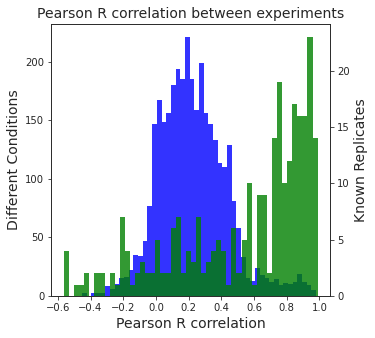

In [17]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
# ax2.hist(rep_corrs.values(),bins=50,range=(-0.2,1),alpha=0.8,color='green',linewidth=0)
# ax.hist(rand_corrs.values(),bins=50,range=(-0.2,1),alpha=0.8,color='blue',linewidth=0)
ax2.hist(rep_corrs.values(),bins=50,alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

Remove samples without any high-correlation replicates

In [42]:
# dissimilar = []
# for idx, grp in DF_metadata_passed_step4.groupby('full_name'):
#     ident = np.identity(len(grp))
#     corrs = (DF_log_tpm[grp.index].corr() - ident).max()
#     dissimilar.extend(corrs[corrs<rcutoff].index)

# # Save this information in both the original metadata dataframe and the new metadata dataframe
# DF_metadata_all['passed_replicate_correlations'] = ~DF_metadata_all.index.isin(dissimilar)
# DF_metadata_passed_step4['passed_replicate_correlations'] = ~DF_metadata_passed_step4.index.isin(dissimilar)

In [43]:
DF_metadata_final = DF_metadata_passed_step4#[DF_metadata_passed_step4['passed_replicate_correlations']]
print('# Samples that passed replicate correlations:',len(DF_metadata_final))

# Samples that passed replicate correlations: 86


## Check that reference conditions still exist
If a reference condition was removed due to poor replicate correlations, a new reference condition needs to be defined.

Again, any samples that fail these checks will be printed below.

In [44]:
project_exprs = []
for name,group in DF_metadata_final.groupby('project'):
    
    # Get reference condition
    ref_cond = group.reference_condition.iloc[0]
    
    # Ensure the reference condition is still in the project
    if ref_cond not in group.condition.tolist():
        print('Reference condition missing from:', name)
    
    # Check that each project has at least two conditions (a reference and at least one test condition)
    if len(group.condition.unique()) <= 1:
        print('Only one condition in:', name)

If necessary, choose a new condition for failed projects and re-run notebook.

## Normalize dataset to reference conditions

In [20]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

In [21]:
project_exprs = []
for name,group in DF_metadata_final.groupby('project'):
    
    # Get reference condition
    ref_cond = group.reference_condition.iloc[0]
    
    # Get reference condition sample ids
    ref_samples = group[group.condition == ref_cond].index
    
    # Get reference condition expression
    ref_expr = DF_log_tpm_final[ref_samples].mean(axis=1)
    
    # Subtract reference expression from project
    project_exprs.append(DF_log_tpm_final[group.index].sub(ref_expr,axis=0))

DF_log_tpm_norm = pd.concat(project_exprs,axis=1)

## Save final datasets

In [23]:
logTPM_qc_file = path.join('..','data','processed_data','log_tpm.csv')
logTPM_norm_file = path.join('..','data','processed_data','log_tpm_norm.csv')
final_metadata_file = path.join('..','data','processed_data','metadata.tsv')
final_metadata_all_file = path.join('..','data','interim','metadata_qc_part2_all.tsv')

DF_log_tpm_final.to_csv(logTPM_qc_file)
DF_log_tpm_norm.to_csv(logTPM_norm_file)
DF_metadata_final.to_csv(final_metadata_file, sep='\t')
DF_metadata_all.to_csv(final_metadata_all_file, sep='\t')

Ok, i didn't really do these last steps because I think I already did the normalizing to uMax. 
Do I need these random other "project" and "condition" columns later? or just here?

In [51]:
DF_log_tpm.to_csv('../data/5g_processed_data/5g_log_tpm_norm_indiv.csv')

In [49]:
reload = pd.read_csv('5g_log_tpm_norm_indiv.csv')

In [50]:
reload

,locus_tag,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,5GB1_FM14_TR1_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,-0.081618,0.013543,-1.005473,-0.565908,-0.868240,-0.861181,-0.860286,-0.810841,-0.466774,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
1,EQU24_RS00010,-0.213951,-0.115316,-0.677320,-0.569877,-1.119576,-1.054664,-1.167149,-1.149678,-0.423026,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
2,EQU24_RS00015,0.002850,-0.174656,-0.639651,-0.279816,-1.029608,-1.120098,-1.028006,-0.996256,-0.586234,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
3,EQU24_RS00020,-0.130356,0.040745,-0.414605,-0.346534,-0.941858,-0.957353,-0.913985,-0.980052,-0.512366,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
4,EQU24_RS00025,0.659048,0.404700,-0.031390,0.291903,-0.787794,-0.640604,-0.818610,-0.839456,-0.307450,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,0.233098,0.224448,-0.183783,-0.574685,-0.595432,-0.635461,-0.421307,-0.361413,-0.451241,...,-0.325961,0.050177,-2.102599,-1.773232,-2.098279,-1.530483,-2.007522,-2.169496,-2.149623,-1.858454
4209,EQU24_RS22140,-0.176841,-0.095379,-1.044380,-1.025606,-1.067681,-1.067686,-1.022445,-0.973605,-0.745638,...,-0.384478,-0.090839,-2.023112,-1.632494,-2.092212,-1.369533,-2.157892,-2.198065,-2.257044,-1.713649
4210,EQU24_RS22145,0.158857,0.144749,-0.784843,-0.435052,-0.574781,-0.535126,-0.518936,-0.496199,-0.494643,...,-0.572687,-0.441383,-2.694444,-2.569869,-2.842215,-2.911701,-3.232890,-2.884240,-3.006455,-2.753670
4211,EQU24_RS22150,-0.119272,-0.070209,-0.957250,-0.589300,-0.643860,-0.659820,-0.675180,-0.631363,-0.318578,...,-1.233437,-0.929800,-2.678648,-2.729526,-2.589713,-2.316455,-3.263189,-3.013563,-2.893263,-2.979200
